In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
from collections import OrderedDict
%matplotlib inline
from datetime import datetime
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
#from keras import models, layers, optimizers, regularizers
#from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from statsmodels.tsa.seasonal import seasonal_decompose

pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('year_2018_state_CA.csv')
#original_length = len(df)
#print(f"The dataset contains {original_length} loan files")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,5,22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,78,80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns

Index(['activity_year', 'lei', 'derived_msa-md', 'state_code', 'county_code',
       'census_tract', 'conforming_loan_limit', 'derived_loan_product_type',
       'derived_dwelling_category', 'derived_ethnicity', 'derived_race',
       'derived_sex', 'action_taken', 'purchaser_type', 'preapproval',
       'loan_type', 'loan_purpose', 'lien_status', 'reverse_mortgage',
       'open-end_line_of_credit', 'business_or_commercial_purpose',
       'loan_amount', 'loan_to_value_ratio', 'interest_rate', 'rate_spread',
       'hoepa_status', 'total_loan_costs', 'total_points_and_fees',
       'origination_charges', 'discount_points', 'lender_credits', 'loan_term',
       'prepayment_penalty_term', 'intro_rate_period', 'negative_amortization',
       'interest_only_payment', 'balloon_payment',
       'other_nonamortizing_features', 'property_value', 'construction_method',
       'occupancy_type', 'manufactured_home_secured_property_type',
       'manufactured_home_land_property_interest', 'total_

In [4]:
df.head()

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open-end_line_of_credit,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,multifamily_affordable_units,income,debt_to_income_ratio,applicant_credit_score_type,co-applicant_credit_score_type,applicant_ethnicity-1,applicant_ethnicity-2,applicant_ethnicity-3,applicant_ethnicity-4,applicant_ethnicity-5,co-applicant_ethnicity-1,co-applicant_ethnicity-2,co-applicant_ethnicity-3,co-applicant_ethnicity-4,co-applicant_ethnicity-5,applicant_ethnicity_observed,co-applicant_ethnicity_observed,applicant_race-1,applicant_race-2,applicant_race-3,applicant_race-4,applicant_race-5,co-applicant_race-1,co-applicant_race-2,co-applicant_race-3,co-applicant_race-4,co-applicant_race-5,applicant_race_observed,co-applicant_race_observed,applicant_sex,co-applicant_sex,applicant_sex_observed,co-applicant_sex_observed,applicant_age,co-applicant_age,applicant_age_above_62,co-applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus-1,aus-2,aus-3,aus-4,aus-5,denial_reason-1,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2018,TR24TWEY5RVRQV65HD49,40140,CA,6071,6.071e+09,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,White,Male,3,0,2,1,2,2,2,1,2,25000.0,74.2,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,360,NaN,1,2,2,2,2,345000,1,1,3,5,1,NaN,71.0,44,7,10,11.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,5.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,1,5,2,4,25-34,9999,No,NaN,1,1,6,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,7800,70.21,65800,114,1433,2096,27
1,2018,TR24TWEY5RVRQV65HD49,44700,CA,6077,6.077e+09,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Black or African American,Female,3,0,2,1,2,2,2,1,2,35000.0,97.82,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,360,NaN,1,2,2,2,2,375000,1,1,3,5,1,NaN,102.0,>60%,7,10,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,3.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,2,5,2,4,35-44,9999,No,NaN,1,1,6,NaN,NaN,NaN,NaN,9,3.0,NaN,NaN,8228,80.40,63700,61,1249,2574,50
2,2018,TR24TWEY5RVRQV65HD49,31460,CA,6039,6.039e+09,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,3,0,2,1,4,2,2,1,2,35000.0,74.51,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,360,NaN,1,2,2,2,2,135000,1,1,3,5,1,NaN,124.0,<20%,7,7,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2,2,6.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,2,2,3,1,2,2,35-44,25-34,No,No,1,1,6,NaN,NaN,NaN,NaN,9,3.0,NaN,NaN,5856,95.59,55200,53,358,1101,33
3,2018,TR24TWEY5RVRQV65HD49,40900,CA,6067,6.06701e+09,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,3,0,2,1,4,2,2,1,2,35000.0,79.34,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,360,NaN,1,2,2,2,2,325000,1,1,3,5,1,NaN,132.0,20%-<30%,7,10,3.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,6.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,3,5,2,4,25-34,9999,No,NaN,1,1,6,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,4905,65.91,80400,97,1042,1432,0
4,2018,TR24TWEY5RVRQV65HD49,40900,CA,6067,6.06701e+09,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Black or Afri

In [5]:
len(df[df.debt_to_income_ratio=='Exempt'])

12723

In [6]:
df.drop(['derived_loan_product_type','purchaser_type','derived_msa-md','multifamily_affordable_units', 'intro_rate_period', 'prepayment_penalty_term','loan_term',
         'lender_credits', 'discount_points','total_points_and_fees','total_loan_costs','activity_year','lei', 'state_code', 'census_tract', 'county_code', 'other_nonamortizing_features','derived_ethnicity', 'derived_race','derived_sex', 
         'applicant_ethnicity-1','applicant_ethnicity-2','applicant_ethnicity-3','applicant_ethnicity-4','applicant_ethnicity-5',
        'co-applicant_ethnicity-1','co-applicant_ethnicity-2','co-applicant_ethnicity-3','co-applicant_ethnicity-4','co-applicant_ethnicity-5',
        'applicant_ethnicity_observed', 'co-applicant_ethnicity_observed', 'applicant_race-1','applicant_race-2','applicant_race-3',
        'applicant_race-4','applicant_race-5','co-applicant_race-1','co-applicant_race-2','co-applicant_race-3','co-applicant_race-4',
        'co-applicant_race-5','applicant_race_observed','co-applicant_race_observed','applicant_sex', 'co-applicant_sex',
        'applicant_sex_observed', 'co-applicant_sex_observed', 'applicant_age', 'co-applicant_age','applicant_age_above_62',
        'co-applicant_age_above_62', 'submission_of_application', 'initially_payable_to_institution', 'aus-1','aus-2','aus-3',
        'aus-4','aus-5','denial_reason-1','denial_reason-2','denial_reason-3','denial_reason-4',],axis=1,inplace=True)



In [7]:
df.drop(df[df.reverse_mortgage==1].index, axis=0, inplace=True)
df.drop(df[df.reverse_mortgage==1111].index, axis=0, inplace=True)
df.drop(df[df.business_or_commercial_purpose==1].index, axis=0, inplace=True)
df.drop(df[df.business_or_commercial_purpose==1111].index, axis=0, inplace=True)
df.drop(df[df.manufactured_home_land_property_interest==2].index, axis=0, inplace=True)
df.drop(df[df.manufactured_home_land_property_interest==4].index, axis=0, inplace=True)
df.drop(df[df.debt_to_income_ratio=='Exempt'].index, axis=0, inplace=True)

In [8]:
df.drop(['reverse_mortgage','business_or_commercial_purpose','manufactured_home_land_property_interest',
         'open-end_line_of_credit','derived_dwelling_category','manufactured_home_secured_property_type',
       'manufactured_home_land_property_interest','co-applicant_credit_score_type','applicant_credit_score_type'],axis=1,inplace=True)

In [9]:
df.drop(df[df.loan_type==3].index, axis=0, inplace=True)
df.drop(df[df.loan_type==4].index, axis=0, inplace=True)

In [10]:
for i in df.columns:
    print(df[i].isna().sum(), i, type(df[i][0]))

127 conforming_loan_limit <class 'str'>
0 action_taken <class 'numpy.int64'>
0 preapproval <class 'numpy.int64'>
0 loan_type <class 'numpy.int64'>
0 loan_purpose <class 'numpy.int64'>
0 lien_status <class 'numpy.int64'>
0 loan_amount <class 'numpy.float64'>
476042 loan_to_value_ratio <class 'str'>
547707 interest_rate <class 'float'>
767151 rate_spread <class 'float'>
0 hoepa_status <class 'numpy.int64'>
774190 origination_charges <class 'float'>
0 negative_amortization <class 'numpy.int64'>
0 interest_only_payment <class 'numpy.int64'>
0 balloon_payment <class 'numpy.int64'>
285167 property_value <class 'str'>
0 construction_method <class 'numpy.int64'>
0 occupancy_type <class 'numpy.int64'>
0 total_units <class 'str'>
124537 income <class 'numpy.float64'>
470866 debt_to_income_ratio <class 'str'>
0 tract_population <class 'numpy.int64'>
0 tract_minority_population_percent <class 'numpy.float64'>
0 ffiec_msa_md_median_family_income <class 'numpy.int64'>
0 tract_to_msa_income_percentag

In [11]:
df.drop(['loan_to_value_ratio', 'interest_rate', 'rate_spread', 'origination_charges', 'property_value'],axis=1, inplace=True)

In [12]:
income_na_index = df[df.income.isna()==True].index.tolist()
debt_to_income_ratio_na_index = df[df.debt_to_income_ratio.isna()==True].index.tolist()

# using all() to  
# check subset of list  
flag = 0
if(all(x in debt_to_income_ratio_na_index for x in income_na_index)): 
    flag = 1
      
# printing result 
if (flag) : 
    print ("Yes, list is subset of other.") 
else : 
    print ("No, list is not subset of other.") 

No, list is not subset of other.


In [13]:
df = df.drop(df[df.debt_to_income_ratio.isna()==True].index)
df = df.drop(df[df.income.isna()==True].index)
df = df.drop(df[df.conforming_loan_limit.isna()==True].index)
len(df)

1010038

In [14]:
df.head()

,conforming_loan_limit,action_taken,preapproval,loan_type,loan_purpose,lien_status,loan_amount,hoepa_status,negative_amortization,interest_only_payment,balloon_payment,construction_method,occupancy_type,total_units,income,debt_to_income_ratio,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,C,3,2,1,2,2,25000.0,3,2,2,2,1,1,1,71.0,44,7800,70.21,65800,114,1433,2096,27
1,C,3,2,1,2,2,35000.0,3,2,2,2,1,1,1,102.0,>60%,8228,80.40,63700,61,1249,2574,50
2,C,3,2,1,4,2,35000.0,3,2,2,2,1,1,1,124.0,<20%,5856,95.59,55200,53,358,1101,33
3,C,3,2,1,4,2,35000.0,3,2,2,2,1,1,1,132.0,20%-<30%,4905,65.91,80400,97,1042,1432,0
4,C,3,2,1,2,2,55000.0,3,2,2,2,1,1,1,145.0,20%-<30%,5080,53.62,80400,161,1343,1481,13


In [15]:
df.conforming_loan_limit.value_counts()

C     880799
NC    129156
U         83
Name: conforming_loan_limit, dtype: int64

In [16]:
df.loc[df['conforming_loan_limit'] == 'C', 'conforming_loan_limit'] = 1
df.loc[df['conforming_loan_limit'] == 'NC', 'conforming_loan_limit'] = 2


In [17]:
df = df.drop(df[df.conforming_loan_limit=='U'].index)

In [18]:
df.action_taken.value_counts()

1    715074
3    259063
2     31517
8      2811
7      1490
Name: action_taken, dtype: int64

In [19]:
df.preapproval.value_counts()

2    984706
1     25249
Name: preapproval, dtype: int64

In [20]:
df.loan_purpose.value_counts()

1     386104
32    231049
31    161258
2     120997
4     110306
5        241
Name: loan_purpose, dtype: int64

In [21]:
#Getting rid of N/A purpose
df = df.drop(df[df.loan_purpose==5].index)

In [22]:
df.lien_status.value_counts()

1    751972
2    257742
Name: lien_status, dtype: int64

In [23]:
df.hoepa_status.value_counts()

2    664788
3    344404
1       522
Name: hoepa_status, dtype: int64

In [24]:
#getting rid of "N/A" status
df = df.drop(df[df.hoepa_status==3].index)

In [25]:
df.negative_amortization.value_counts()

2       664907
1111       368
1           35
Name: negative_amortization, dtype: int64

In [26]:
df = df.drop(df[df.negative_amortization==1].index)
df = df.drop(df[df.negative_amortization==1111].index)
df.drop('negative_amortization',axis=1,inplace=True)

In [27]:
df.interest_only_payment.value_counts()

2    600507
1     64400
Name: interest_only_payment, dtype: int64

In [28]:
df.balloon_payment.value_counts()

2    658632
1      6275
Name: balloon_payment, dtype: int64

In [29]:
#getting rid of balloon payments since not many cases and not common
df = df.drop(df[df.balloon_payment==1].index)
df.drop('balloon_payment',axis=1,inplace=True)

In [30]:
df.construction_method.value_counts()

1    649681
2      8951
Name: construction_method, dtype: int64

In [31]:
df.occupancy_type.value_counts()

1    631850
3     16853
2      9929
Name: occupancy_type, dtype: int64

In [32]:
df.total_units.value_counts()

1    367667
1    278606
2      5092
2      3770
3      1085
4       940
3       820
4       652
Name: total_units, dtype: int64

In [33]:
df.loc[df['total_units'] == '1', 'total_units'] = 1
df.loc[df['total_units'] == '2', 'total_units'] = 2
df.loc[df['total_units'] == '3', 'total_units'] = 3
df.loc[df['total_units'] == '4', 'total_units'] = 4
df.total_units.value_counts()

1    646273
2      8862
3      1905
4      1592
Name: total_units, dtype: int64

In [34]:
df.loc[df['debt_to_income_ratio'] == '49', 'debt_to_income_ratio'] = '45%-<50%'
df.loc[df['debt_to_income_ratio'] == '48', 'debt_to_income_ratio'] = '45%-<50%'
df.loc[df['debt_to_income_ratio'] == '47', 'debt_to_income_ratio'] = '45%-<50%'
df.loc[df['debt_to_income_ratio'] == '46', 'debt_to_income_ratio'] = '45%-<50%'
df.loc[df['debt_to_income_ratio'] == '45', 'debt_to_income_ratio'] = '45%-<50%'

df.loc[df['debt_to_income_ratio'] == '40', 'debt_to_income_ratio'] = '40%-<45%'
df.loc[df['debt_to_income_ratio'] == '41', 'debt_to_income_ratio'] = '41%-<45%'
df.loc[df['debt_to_income_ratio'] == '42', 'debt_to_income_ratio'] = '42%-<45%'
df.loc[df['debt_to_income_ratio'] == '43', 'debt_to_income_ratio'] = '43%-<45%'
df.loc[df['debt_to_income_ratio'] == '44', 'debt_to_income_ratio'] = '44%-<45%'

df.loc[df['debt_to_income_ratio'] == '39', 'debt_to_income_ratio'] = '37%-<40%'
df.loc[df['debt_to_income_ratio'] == '38', 'debt_to_income_ratio'] = '37%-<40%'
df.loc[df['debt_to_income_ratio'] == '37', 'debt_to_income_ratio'] = '37%-<40%'
df.loc[df['debt_to_income_ratio'] == '36', 'debt_to_income_ratio'] = '37%-<40%'
df.loc[df['debt_to_income_ratio'] == '35', 'debt_to_income_ratio'] = '37%-<40%'



df.debt_to_income_ratio.value_counts()

45%-<50%    136992
30%-<36%    103962
37%-<40%     96484
20%-<30%     86858
50%-60%      41561
42%-<45%     40024
44%-<45%     35331
41%-<45%     30945
43%-<45%     28946
40%-<45%     28518
<20%         24503
>60%          4508
Name: debt_to_income_ratio, dtype: int64

In [35]:
##TARGET
df.loan_type.value_counts()

1    588925
2     69707
Name: loan_type, dtype: int64

In [36]:
df.income.head()

17      435.0
182     142.0
194     708.0
195     282.0
196    1376.0
Name: income, dtype: float64

### EDA

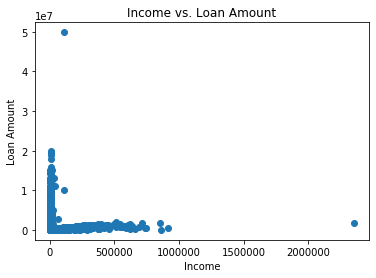

In [37]:
plt.scatter(df.income,df.loan_amount)
plt.xlabel("Income")
plt.ylabel("Loan Amount")
plt.title("Income vs. Loan Amount")
plt.show()

In [38]:
print(df.income.min(), df.income.max())

-945.0 2356788.0


In [39]:
print(df.loan_amount.min(), df.loan_amount.max())

5000.0 49905000.0


In [40]:
df.drop(df[df.income>1000].index, inplace=True)
df.drop(df[df.income<=0].index, inplace=True)
df.drop(df[df.loan_amount>5000000].index, inplace=True)

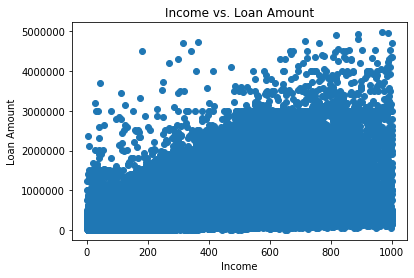

In [41]:
plt.scatter(df.income,df.loan_amount)
plt.xlabel("Income")
plt.ylabel("Loan Amount")
plt.title("Income vs. Loan Amount")
plt.show()

In [42]:
transformed_df = pd.get_dummies(df)

In [43]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

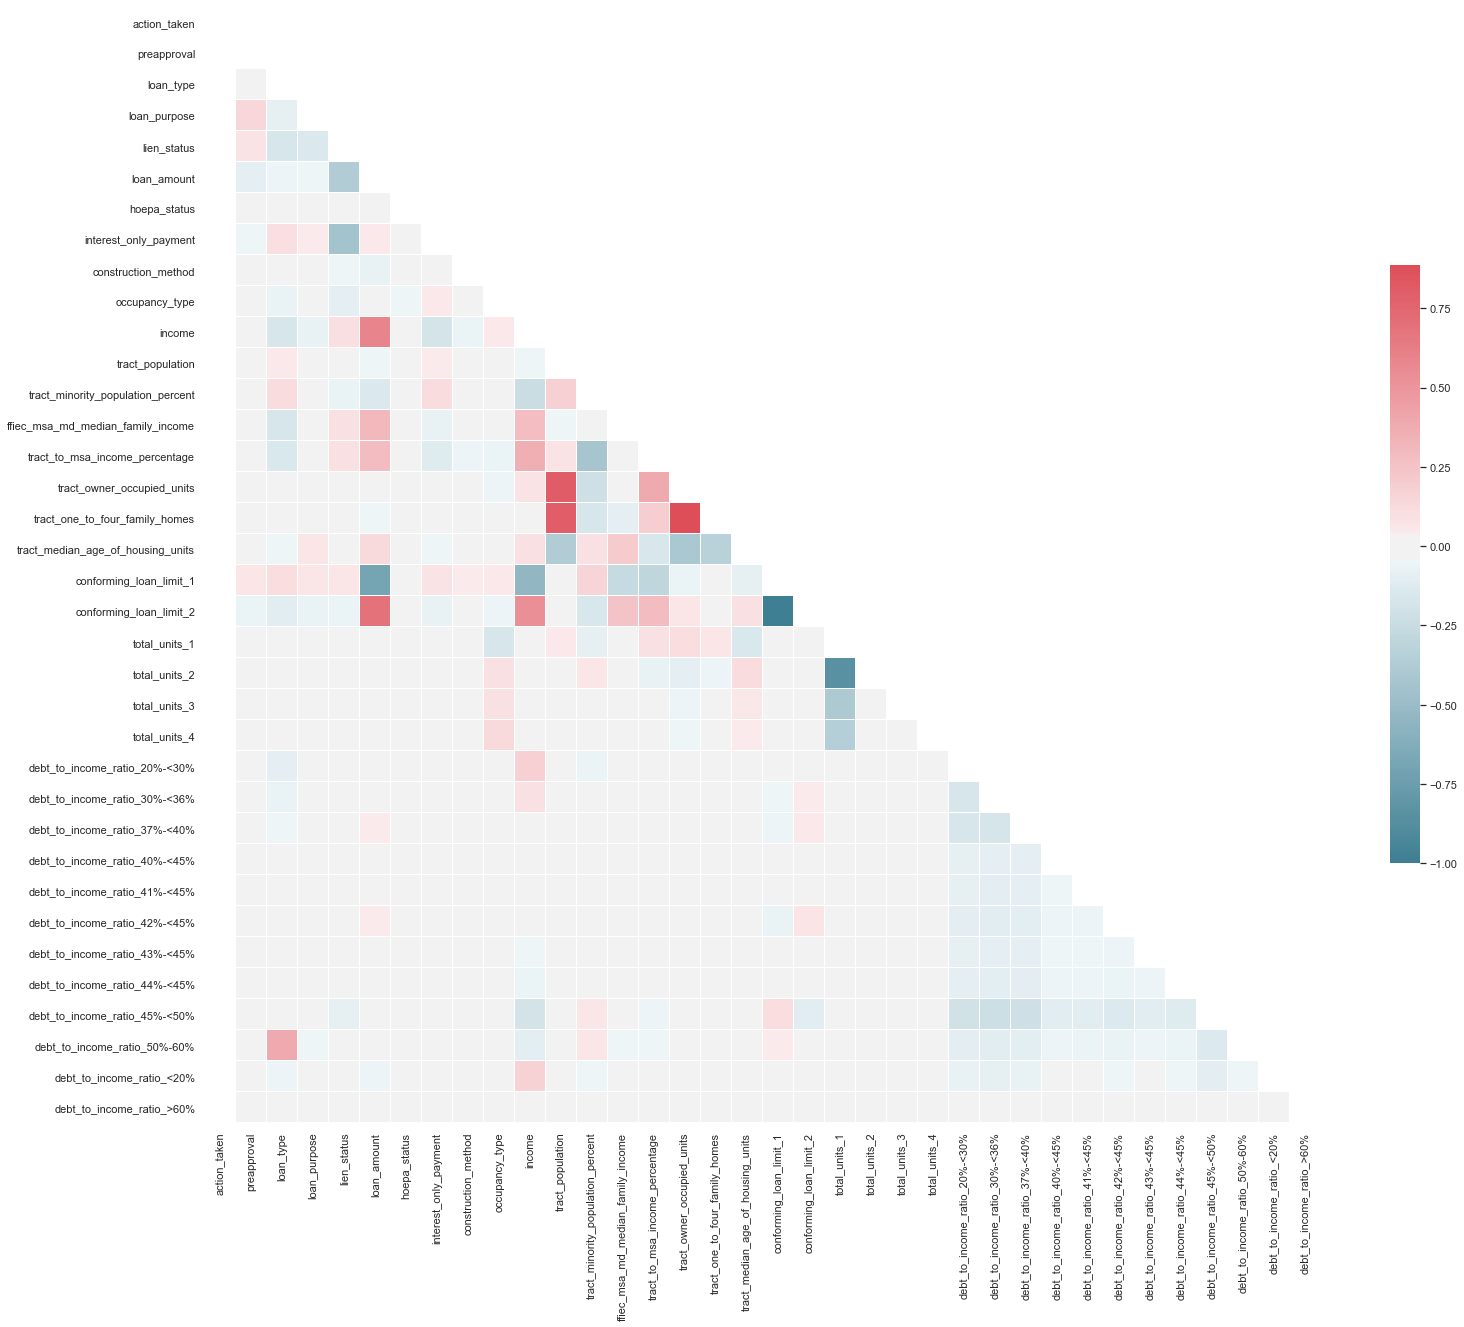

In [44]:
multi_collinearity_heatmap(transformed_df, figsize=(25,22))

In [45]:
# Separating X and y
X = transformed_df.drop('loan_type', axis=1)
y = transformed_df.loan_type

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [47]:
from sklearn.ensemble import RandomForestClassifier

rfr = RandomForestClassifier(n_estimators=100, max_depth=10)
#param_grid = [
  #{'max_depth': [5,15,20]}
#]
#grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=3, verbose=-1)
#grid_search.fit(X_train, y_train)

rfr.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
train_rf_predictions = rfr.predict(X_train)
train_rf_probs = rfr.predict_proba(X_train)[:, 1]

rf_predictions = rfr.predict(X_test)
rf_probs = rfr.predict_proba(X_test)[:, 1]

In [49]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))], pos_label=2)
    model_fpr, model_tpr, _ = roc_curve(y_test, probs, pos_label=2)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

Recall Baseline: 1.0 Test: 0.99 Train: 0.99
Precision Baseline: 0.89 Test: 0.93 Train: 0.93
Roc Baseline: 0.5 Test: 0.9 Train: 0.9


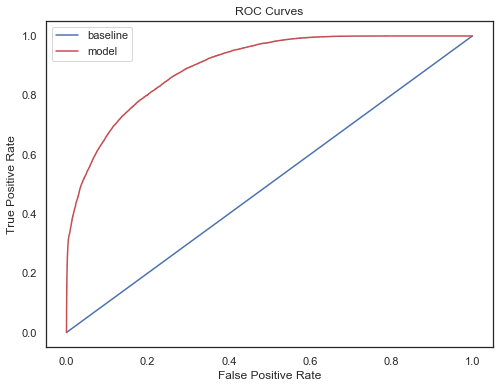

In [50]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

In [51]:
pd.set_option('display.max_rows', None)
ft_weights_rfr = pd.DataFrame(rfr.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_rfr.sort_values('weight', inplace=True)
ft_weights_rfr

,weight
action_taken,0.000000
hoepa_status,0.000047
total_units_4,0.000059
total_units_3,0.000087
debt_to_income_ratio_>60%,0.000134
debt_to_income_ratio_40%-<45%,0.000211
debt_to_income_ratio_43%-<45%,0.000244
total_units_1,0.000347
debt_to_income_ratio_41%-<45%,0.000398
debt_to_income_ratio_42%-<45%,0.000437


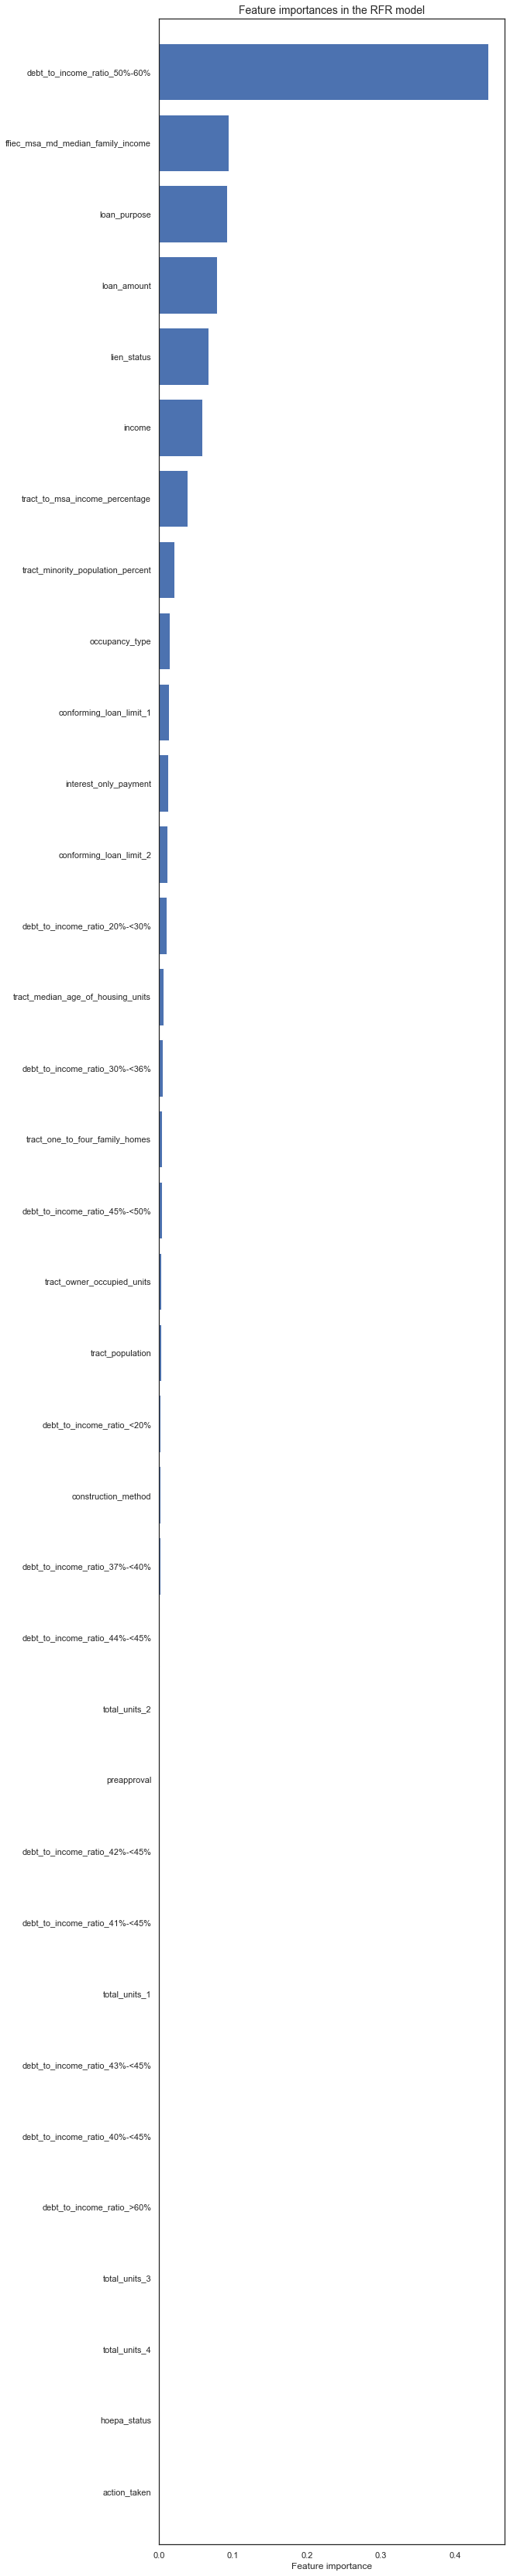

In [52]:
plt.figure(figsize=(8,60))
plt.barh(ft_weights_rfr.index, ft_weights_rfr.weight, align='center') 
plt.title("Feature importances in the RFR model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()